In [1]:
import IPython
import os
os.system("ls [a-z]*.md | grep -Ev 'audris' | sed 's/\.md$//'| sort -u >ids.txt")
with open('ids.txt') as f:
    files = [ x.strip('\n') for x in f.readlines() ]
print (files)

# Create labels for the graph
flab = files
len(files)

['aking100', 'alecfowl', 'amarlow6', 'amcclu13', 'aroman', 'awarden9', 'aweis3', 'bfitzpa8', 'bmaples6', 'bmilstea', 'btolson1', 'calle102', 'ccanonac', 'ccotturo', 'ckornega', 'cstefani', 'cvy221', 'cwalsh25', 'cwitt8', 'cwoodfil', 'ddelrosa', 'dferrer1', 'dfranke2', 'dhodge12', 'dmoffit1', 'dpate139', 'dwang58', 'edayney', 'ehead3', 'ehechmer', 'emaness', 'ezhao1', 'fchernow', 'fgholamr', 'glapham', 'glee30', 'gpatel8', 'harshvar', 'hchen73', 'ibhandar', 'jaugust4', 'jburns46', 'jchoi38', 'jclar166', 'jhenley9', 'jkutbay', 'jleuciu1', 'jmuncy2', 'jnd547', 'jtayl219', 'kchmayss', 'knguye34', 'lhunte21', 'lscott32', 'marifova', 'mdv623', 'mherna21', 'mkelle37', 'mmarcu10', 'mmccor23', 'monim', 'mwebb51', 'mzg857', 'ncoffey3', 'npatton4', 'nvanflee', 'pkx959', 'pmasani', 'pmoore34', 'rfranqui', 'rking61', 'rlin8', 'san6', 'sbandar1', 'sdasari7', 'sgray38', 'slavey', 'smoparth', 'snidiff1', 'spatil12', 'tcatunca', 'thatngu1', 'tvillarr', 'vbroda', 'vgopu', 'wduff', 'wwinslad', 'yarddoga'

91

In [2]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
documents = []

text = ""
for f in files:
  a = open (f+".md")
  line = a.read().lower()
  if ('ghid:' not in line) and ('hfid' not in line): 
    documents .append(line)
    text = text + " " + line
      
#Do tf.idf magic 
tfidf = TfidfVectorizer().fit_transform(documents)
# no need to normalize, since Vectorizer will return normalized tf-idf
# we may want to see these, e.g., analyze in R
pd .DataFrame.from_records(tfidf.A).to_csv('tfidf.csv')

In [3]:
# Lets see the similarity matrix
# first create labels
idx = {}
for i in range(len(files)):
    idx[i] = files [i]

# Multiply the tfidf matrix to get all pairwise distances    
df = pd. DataFrame.from_records((tfidf * tfidf.T).A,columns=files)

#do pretty printing
pd.options.display.float_format = '{:20,.3f}'.format
df = df.rename(index=idx)
#Output to a file in case we want to look at it separately
df.to_csv("dist.csv")
df

,aking100,alecfowl,amarlow6,amcclu13,aroman,awarden9,aweis3,bfitzpa8,bmaples6,bmilstea,...,thatngu1,tvillarr,vbroda,vgopu,wduff,wwinslad,yarddoga,ygaikwad,yhg461,zyr546
aking100,1.000,0.058,0.057,0.213,0.114,0.120,0.093,0.072,0.067,0.060,...,0.067,0.035,0.085,0.022,0.056,0.104,0.057,0.073,0.068,0.066
alecfowl,0.058,1.000,0.107,0.158,0.125,0.172,0.130,0.225,0.076,0.084,...,0.159,0.117,0.167,0.049,0.125,0.096,0.168,0.112,0.156,0.076
amarlow6,0.057,0.107,1.000,0.098,0.142,0.131,0.105,0.123,0.059,0.085,...,0.169,0.106,0.153,0.070,0.114,0.125,0.060,0.106,0.132,0.201
amcclu13,0.213,0.158,0.098,1.000,0.155,0.146,0.132,0.125,0.083,0.089,...,0.046,0.056,0.137,0.021,0.114,0.114,0.141,0.108,0.169,0.135
aroman,0.114,0.125,0.142,0.155,1.000,0.194,0.212,0.158,0.164,0.126,...,0.104,0.105,0.330,0.035,0.137,0.229,0.112,0.181,0.145,0.135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wwinslad,0.104,0.096,0.125,0.114,0.229,0.098,0.199,0.073,0.127,0.136,...,0.097,0.095,0.188,0.043,0.138,1.000,0.083,0.211,0.153,0.101
yarddoga,0.057,0.168,0.060,0.141,0.112,0.103,0.132,0.169,0.085,0.093,...,0.082,0.054,0.221,0.032,0.104,0.083,1.000,0.122,0.153,0.108
ygaikwad,0.073,0.112,0.106,0.108,0.181,0.150,0.187,0.111,0.096,0.148,...,0.053,0.102,0.260,0.061,0.079,0.211,0.122,1.000,0.129,0.108
yhg461,0.068,0.156,0.132,0.169,0.145,0.149,0.127,0.187,0.113,0.179,...,0.140,0.080,0.160,0.100,0.152,0.153,0.153,0.129,1.000,0.161


0.6701095095201343
harshvar mzg857 rking61 vgopu cwoodfil jleuciu1 
aking100 amcclu13 ckornega dhodge12 jaugust4 
san6 cvy221 snidiff1 sdasari7 slavey 
awarden9 jburns46 ehechmer glee30 zyr546 amarlow6 
edayney cstefani npatton4 ccotturo jchoi38 dmoffit1 
lscott32 bmaples6 cwalsh25 mdv623 calle102 sgray38 
pmasani tvillarr dpate139 nvanflee thatngu1 aweis3 
mherna21 smoparth monim mwebb51 wwinslad 
ygaikwad dferrer1 aroman vbroda bmilstea emaness 
kchmayss ibhandar jtayl219 glapham mkelle37 
ccanonac fgholamr pmoore34 btolson1 jmuncy2 cwitt8 
pkx959 spatil12 gpatel8 jkutbay marifova 
mmccor23 dfranke2 ddelrosa ezhao1 yarddoga 
alecfowl ncoffey3 mmarcu10 tcatunca wduff 
knguye34 rlin8 rfranqui yhg461 dwang58 fchernow 
jnd547 bfitzpa8 lhunte21 jclar166 hchen73 
jhenley9 ehead3 sbandar1 


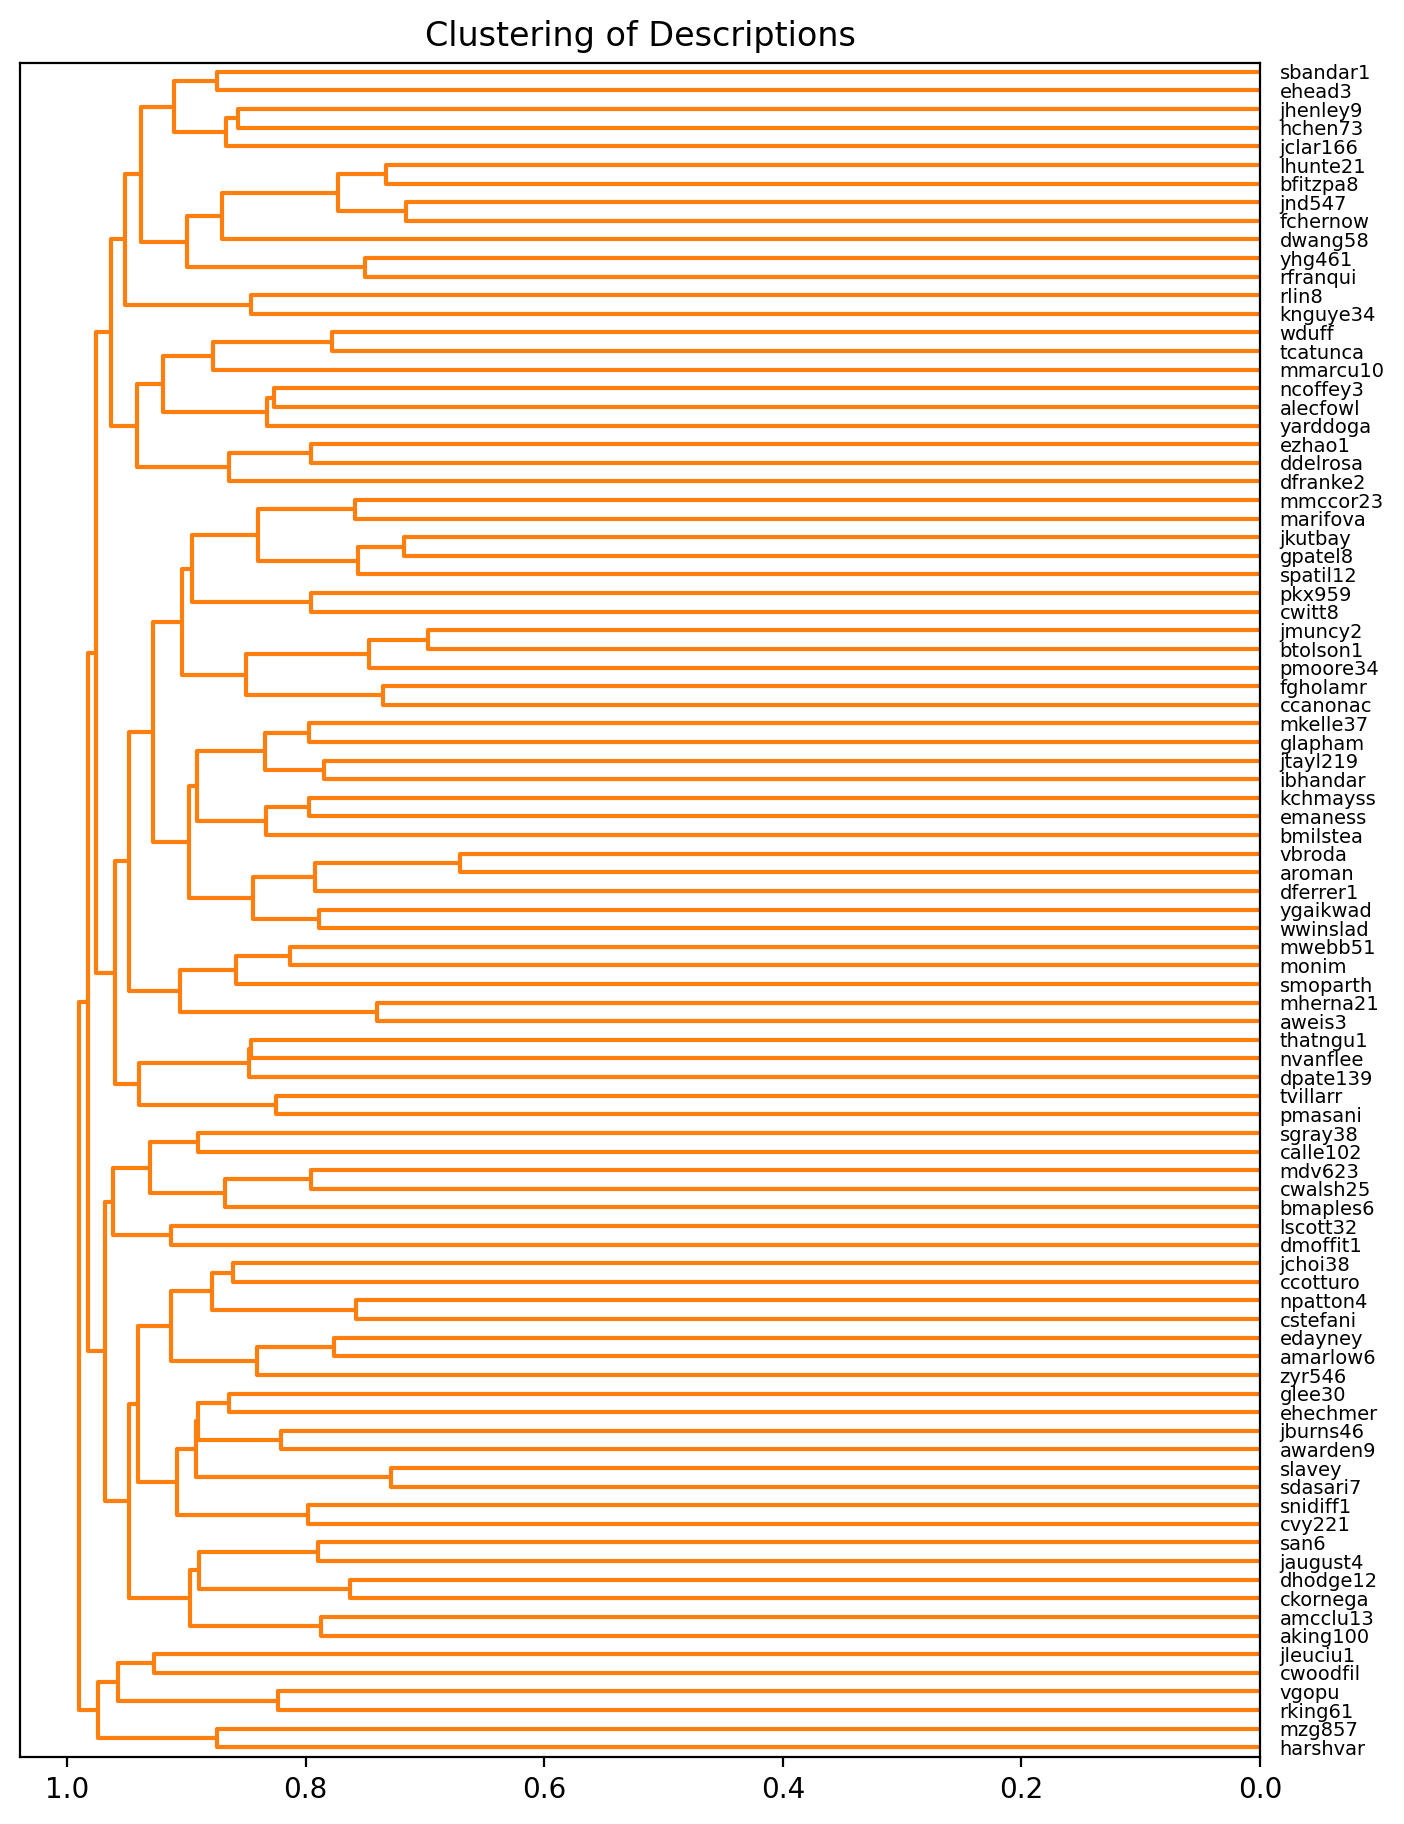

In [4]:
from scipy.cluster.hierarchy import linkage, ward, dendrogram
from scipy.spatial.distance import pdist
import math, sys
import matplotlib.pyplot as plt
import numpy as np
import re
import random

%matplotlib inline

# Calculate cosine distance (clustering needs distance, not similarity)   
#dist ij = dist2 [i*(n-1)+j] and i < j
dist1 = pdist(tfidf.A, 'cosine')
minVal = min(dist1)
print(minVal)
d1 = len(files)-1
ij = np.where(dist1==minVal)[0][0]
for i in range(0,d1):
    for j in range (i+1,d1):
        ij -= 1
        if ij == 0: 
            break
    else:        
        continue  
    break



# Do clustering
linkage_matrix = linkage (dist1, method='complete')
#print(linkage_matrix)

# Plot results
fig = plt.figure(1, figsize=(8, 11),dpi=200)
plt.clf()
ddata = dendrogram(linkage_matrix,
               color_threshold=1,
               p=97,
               labels=flab,
               truncate_mode='none',
               orientation='left',
                show_leaf_counts=True,leaf_font_size =7
               )
j = 0
while j < 91:
  for i in range (1,random.randint(6,7)):
    sys.stdout.write(flab[ddata['leaves'][j]]+' ')
    j+=1
    if (j>=91): break
  sys.stdout.write('\n')

plt.title("Clustering of Descriptions")
fig.savefig("teaming.png")

# Investigate interactive graph

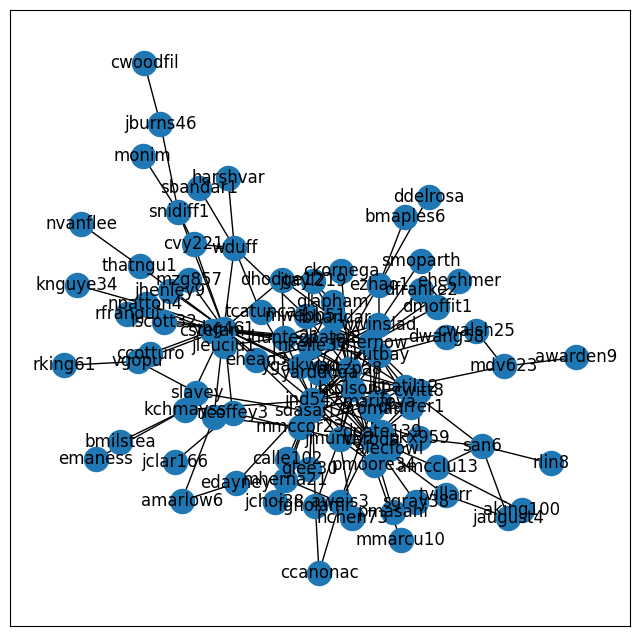

In [5]:

import networkx as nx
import json
import matplotlib.pyplot as plt
%matplotlib inline


# use these distances to create a graph by cutting links below .2 
lbl = {}
nxg = nx.Graph()
for i in range(len(files)-1):
    nxg.add_node(i, label=flab[i])
    lbl[i]=flab[i]
for i in range(len(files)-1):    
    nLinks = 0
    maxVal = 0
    jMax = 0
    for j in range(i+1,len(files)):        
        if df.iloc[i,j] > maxVal: 
            maxVal = df.iloc[i,j]
            if i != j: jMax = j
        if (df.iloc[i,j] > .2):
            nLinks += 1
            nxg.add_edge(i, j, weight=math.sqrt(df.iloc[i,j]*150+1),color='yellow')
    if nLinks == 0:
        nxg.add_edge(i, jMax, weight=10,color='red')
        
#print (nxg.nodes())

fig, ax = plt.subplots(1, 1, figsize=(8, 8));
nx.draw_networkx(nxg, ax=ax, labels=lbl )


nodes = [{'name': nxg.nodes()[i]  } for i in nxg.nodes() ]
links = [{'source': u[0], 'target': u[1]} for u in nxg.edges()]
with open('graph.json', 'w') as f:
    json.dump({'nodes': nodes, 'links': links}, f, indent=4,)





In [6]:
%%html
<div id="d3-students"></div>
<style>
.node {stroke: #fff; stroke-width: 1.5px;}
.link {stroke: #999; stroke-opacity: .6;}
</style>

In [7]:
%%javascript
// We load the d3.js library from the Web.
require.config({paths:
    {d3: "http://d3js.org/d3.v3.min"}});
require(["d3"], function(d3) {
  // The code in this block is executed when the
  // d3.js library has been loaded.

  // First, we specify the size of the canvas
  // containing the visualization (size of the
  // <div> element).
  var width = 300, height = 300;

  // We create a color scale.
  var color = d3.scale.category10();

  // We create a force-directed dynamic graph layout.
  var force = d3.layout.force()
    .charge(-50)
    .linkDistance(20)
    .size([width, height]);

  // In the <div> element, we create a <svg> graphic
  // that will contain our interactive visualization.
  var svg = d3.select("#d3-students").select("svg")
  if (svg.empty()) {
    svg = d3.select("#d3-students").append("svg")
          .attr("width", width)
          .attr("height", height);
  }

  // We load the JSON file.
  d3.json("graph.json", function(error, graph) {
    // In this block, the file has been loaded
    // and the 'graph' object contains our graph.

    // We load the nodes and links in the
    // force-directed graph.
    force.nodes(graph.nodes)
      .links(graph.links)
      .start();

    // We create a <line> SVG element for each link
    // in the graph.
    var link = svg.selectAll(".link")
      .data(graph.links)
      .enter().append("line")
      .attr("class", "link");

    // We create a <circle> SVG element for each node
    // in the graph, and we specify a few attributes.
    var node = svg.selectAll(".node")
      .data(graph.nodes)
      .enter().append("circle")
      .attr("class", "node")
      .attr("r", 5)  // radius
      .style("fill", function(d) {
         // The node color depends on the club.
         return color(d.name);
      })
      .call(force.drag);

    // The name of each node is the node number.
    node.append("title")
        .text(function(d) { return d.name['label']; });


    // We bind the positions of the SVG elements
    // to the positions of the dynamic force-directed
    // graph, at each time step.
    force.on("tick", function() {
      link.attr("x1", function(d){return d.source.x})
          .attr("y1", function(d){return d.source.y})
          .attr("x2", function(d){return d.target.x})
          .attr("y2", function(d){return d.target.y});

      node.attr("cx", function(d){return d.x})
          .attr("cy", function(d){return d.y});
    });
  });
});

<IPython.core.display.Javascript object>